## DSCI 521 – Data Acquisition and Pre-processing

**Group 7, Winter 2023**

## Flight Data Exploratory Analysis

Visualizing and modifying available data in our selected dataset.

Dataset obtained from Kaggle :
https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?select=train_sets_documentation.txt

Dataset contains information on flights occurring in 2019, with statistics on flight delay, carrier and airport information and weather data.

In [2]:
#load data into pandas

# importing the module
import pandas as pd

flight_data = pd.read_csv('data/train.csv', dtype={"Month": "int8", "Year": "int8", "DEP_DEL15": "int8", "DISTANCE_GROUP":"int8", "SEGMENT_NUMBER":"int8"})

Display data sample from pandas

In [4]:
flight_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


## Available Data

The creator of the dataset retrieved from Kaggle removed a number of available data points before generating the final data file. After doing an intial run of the models with the provided data, we went back in and added additional weather data points to improve our results.

#### Original Columns:

- **MONTH** - Month
- **DAY_OF_WEEK** - Day of Week
- **DEP_DEL15** - TARGET Binary of a departure delay over 15 minutes (1 is yes, 0 is no)
- **DISTANCE_GROUP** - Distance group to be flown by departing aircraft
- **DEP_BLOCK** - Departure block
- **SEGMENT_NUMBER** - The segment that this tail number is on for the day
- **CONCURRENT_FLIGHTS** - Concurrent flights leaving from the airport in the same departure block
- **NUMBER_OF_SEATS** - Number of seats on the aircraft
- **CARRIER_NAME** - Carrier (airline name)
- **AIRPORT_FLIGHTS_MONTH** - Avg Airport Flights per Month
- **AIRLINE_FLIGHTS_MONTH** - Avg Airline Flights per Month
- **AIRLINE_AIRPORT_FLIGHTS_MONTH** - Avg Flights per month for Airline AND Airport
- **AVG_MONTHLY_PASS_AIRPORT** - Avg Passengers for the departing airport for the month
- **AVG_MONTHLY_PASS_AIRLINE** - Avg Passengers for airline for month
- **FLT_ATTENDANTS_PER_PASS** - Flight attendants per passenger for airline
- **GROUND_SERV_PER_PASS** - Ground service employees (service desk) per passenger for airline
- **PLANE_AGE** - Age of departing aircraft
- **DEPARTING_AIRPORT** - Departing Airport
- **LATITUDE** - Latitude of departing airport
- **LONGITUDE** - Longitude of departing airport
- **PREVIOUS_AIRPORT** - Previous airport that aircraft departed from
- **PRCP** - Inches of precipitation for day
- **SNOW** - Inches of snowfall for day
- **SNWD** - Inches of snow on ground for day
- **TMAX** - Max temperature for day
- **AWND** - Max wind speed for day

#### Added Columns:

Weather stat breakdown

- **TMAX** - max temp
- **TAVG** - average temp
- **TMIN** - min temp

WT category - these are true/false so 1 indicates this weather event was present with 0 meaning not present

- **WT01** - fog
- **WT02** - heavy or heavy freezing fog
- **WT03** - thunder
- **WT05** - hail
- **WT07** - blowing dust, sand or other obstruction
- **WT08** - smoke or haze
- **WT09** - blowing or drifting snow
- **WT10** - tornado, waterspout or funnel cloud
- **WT11** - high or damaging winds


In [3]:
for col in flight_data.columns:
    print(col)

MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


## Exploration of trends in the data

Summarize airlines covered by the dataset with count of flights by carrier

In [5]:
flight_data.value_counts(subset = 'CARRIER_NAME')

CARRIER_NAME
Southwest Airlines Co.          907076
Delta Air Lines Inc.            657062
American Airlines Inc.          632771
United Air Lines Inc.           420624
SkyWest Airlines Inc.           409126
Midwest Airline, Inc.           210298
JetBlue Airways                 188402
Alaska Airlines Inc.            167595
American Eagle Airlines Inc.    160390
Comair Inc.                     153365
Endeavor Air Inc.               142498
Spirit Air Lines                132678
Mesa Airlines Inc.              124171
Frontier Airlines Inc.           84970
Atlantic Southeast Airlines      69161
Hawaiian Airlines Inc.           52444
Allegiant Air                    29712
dtype: int64

In [6]:
#total delays
flight_data["DEP_DEL15"].sum()

859158

In [7]:
delay_by_departing_airport = flight_data.groupby(by="DEPARTING_AIRPORT")["DEP_DEL15"].sum()
delay_by_departing_airport.sort_values(ascending=False)

DEPARTING_AIRPORT
Chicago O'Hare International      51760.0
Atlanta Municipal                 46154.0
Dallas Fort Worth Regional        46049.0
Stapleton International           39030.0
Douglas Municipal                 31669.0
                                   ...   
Portland International Jetport      542.0
Pensacola Regional                  534.0
Spokane International               309.0
Sanford NAS                         248.0
Puerto Rico International            19.0
Name: DEP_DEL15, Length: 96, dtype: float64

In [28]:
delay_by_origin_airport = flight_data.groupby(by="CARRIER_NAME")["DEP_DEL15"].sum()
delay_by_origin_airport

delay_by_airport_list = []
for row in delay_by_origin_airport.iteritems():
    delay_by_airport_list.append(row)

In [12]:
#average precipitation at most delayed airport
Chicago_rain = flight_data.groupby(by="DEPARTING_AIRPORT").get_group("Chicago O'Hare International")["PRCP"].mean()
Chicago_rain

0.12911043131125713

In [33]:
#flights by airport
flight_by_depart_airport = flight_data.value_counts(subset = 'DEPARTING_AIRPORT')

flight_by_depart_airport_list = []
for row in flight_by_depart_airport.iteritems():
    flight_by_depart_airport_list.append(row)

In [7]:
flight_data[["MONTH", "DEP_DEL15"]].groupby("MONTH").sum()

,DEP_DEL15
MONTH,
1,61338.0
2,68538.0
3,67574.0
4,69109.0
5,79612.0
6,94849.0
7,86043.0
8,83617.0
9,51116.0


In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

from collections import Counter

## initialize a counter for the positions
departing = Counter()

## loop over rows to count up the positions
for ix, row in flight_data.iterrows():
    departing[row["DEPARTING_AIRPORT"]] += 1

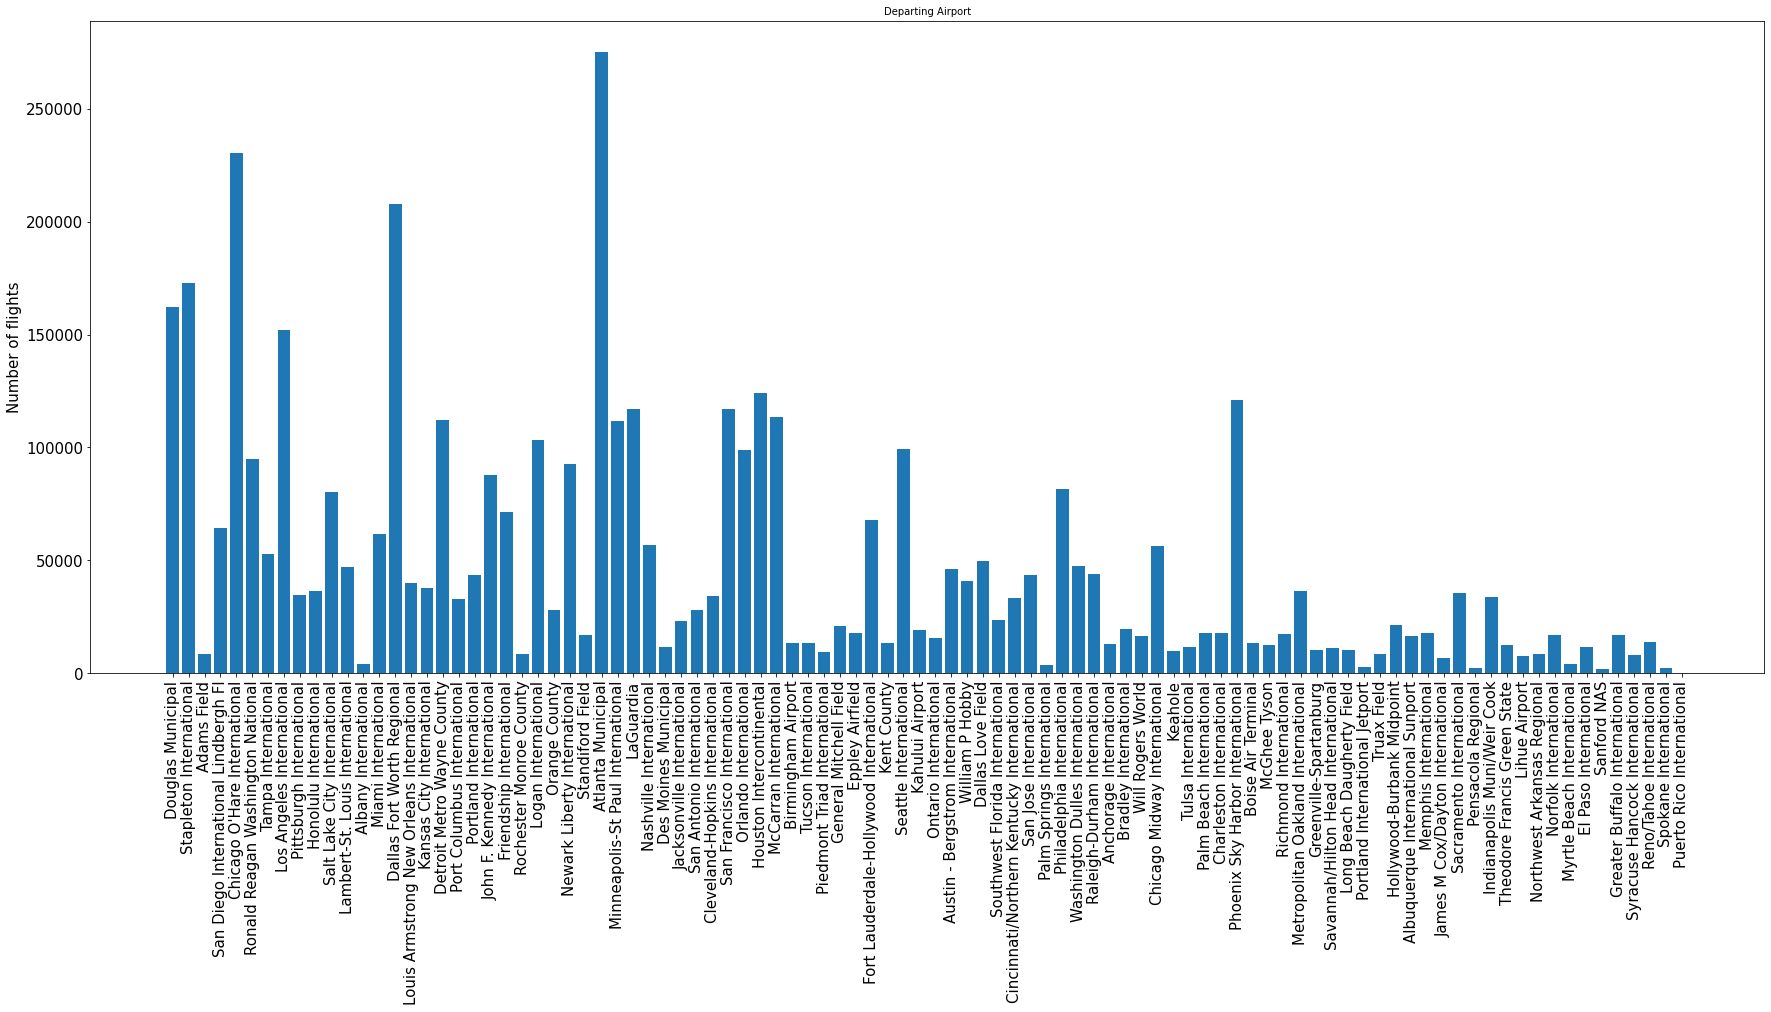

In [33]:
bar_fig = plt.figure(figsize = (30, 12)) 
    
## note the plot.bar() function takes an x-positon for bars
## in the event that data are not categorical,
## but we'll just use discrete positioning, i.e., left = [1,2,3, ...]
## to space out the bars
_  = plt.bar(
    x = range(1, len(departing) + 1),
    height = list(departing.values()),
    tick_label = list(departing.keys())
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Departing Airport", fontsize = 10)

## Set the y-label
_ = plt.ylabel("Number of flights", fontsize = 15)

## rotate the x-tick labels
_ = plt.xticks(rotation = 90)